## Observations and Insights 

In [44]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how='left', on='Mouse ID')

# Displaying the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = pd.DataFrame({'Total Number of Mouse': [combined_data['Mouse ID'].nunique()]})
mouse_count

,Total Number of Mouse
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), "Mouse ID"].unique() 
duplicated_mouse

array(['g989'], dtype=object)

In [4]:
# Getting all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data['Mouse ID'].isin(duplicated_mouse)==True]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_data.loc[clean_data['Mouse ID'].isin(duplicated_mouse)==True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [49]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = pd.DataFrame({'Total Number of Mouse': [clean_data['Mouse ID'].nunique()]})
mouse_count2

,Total Number of Mouse
0,249


## Summary Statistics

In [7]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

volume_mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
volume_sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Creating multiple series and putting them all together at the end.
volume_summary = pd.DataFrame({"Mean": volume_mean,
                               "Median": volume_median,
                               "Variance": volume_var,
                               "Standard Deviation": volume_std,
                               "SEM": volume_sem
                              })
print("\n\tSummary Statistics of the tumor volume for each regimen")
volume_summary = volume_summary.applymap("{0:.2f}".format)
volume_summary


	Summary Statistics of the tumor volume for each regimen


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
volume_df = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':[('Mean', 'mean'), 
                                                                             ('Median', 'median'), 
                                                                             ('Variance', 'var'), 
                                                                             ('Standard Deviation', 'std'), 
                                                                             ('SEM', 'sem')]})
volume_df = volume_df.applymap("{0:.2f}".format)
volume_df

Tumor Volume (mm3)                                         
                           Mean Median Variance Standard Deviation   SEM
Drug Regimen                                                            
Capomulin                 40.68  41.56    24.95               4.99  0.33
Ceftamin                  52.59  51.78    39.29               6.27  0.47
Infubinol                 52.88  51.82    43.13               6.57  0.49
Ketapril                  55.24  53.70    68.55               8.28  0.60
Naftisol                  54.33  52.51    66.17               8.13  0.60
Placebo                   54.03  52.29    61.17               7.82  0.58
Propriva                  52.38  50.78    43.22               6.57  0.53
Ramicane                  40.22  40.67    23.49               4.85  0.32
Stelasyn                  54.23  52.43    59.45               7.71  0.57
Zoniferol                 53.24  51.82    48.53               6.97  0.52

## Bar and Pie Charts

In [50]:
# Customizing the default style in Matplotlib rc file
plt.rcParams.update({'font.size': 12})

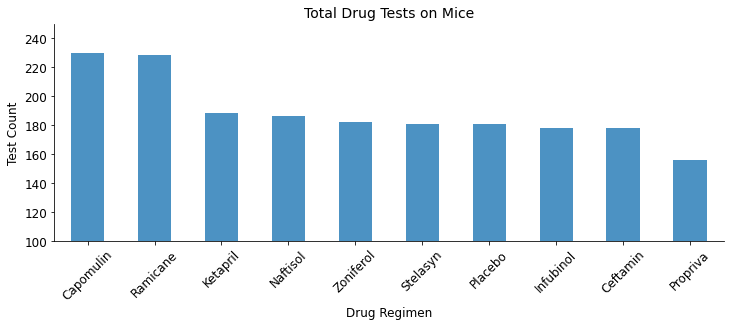

<Figure size 432x288 with 0 Axes>

In [56]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_test_count = pd.DataFrame(clean_data['Drug Regimen'].value_counts()).reset_index()
drug_test_count = drug_test_count.rename(columns={'index': 'Drug Regimen', 'Drug Regimen': 'Mouse Count'})

ax = drug_test_count.plot(kind="bar",
                          figsize=(12,4),
                          alpha=0.8,
                          legend=False,
                          ylim=(100, max(drug_test_count['Mouse Count'])+20)
                         )

ax.set_title("Total Drug Tests on Mice", fontsize=14)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Test Count")
ax.set_xticklabels(drug_test_count['Drug Regimen'], rotation=45)
    
plt.show()
plt.tight_layout()

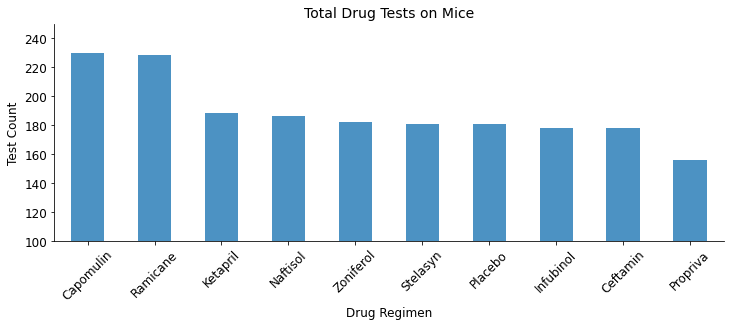

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_test_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,4))
plt.bar(x_axis, drug_test_count['Mouse Count'], alpha=0.8, width=.5)
plt.xticks(tick_locations, drug_test_count['Drug Regimen'], rotation=45)

plt.title("Total Drug Tests on Mice", fontsize=14)
plt.xlabel("Drug Regimen")
plt.ylabel("Test Count")
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(100, max(drug_test_count['Mouse Count'])+20)

plt.show()
plt.tight_layout()

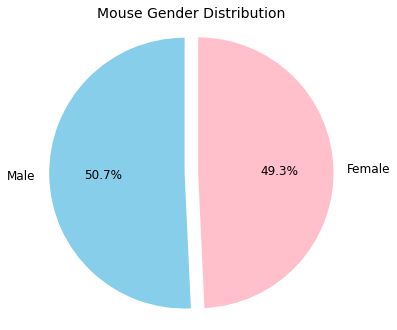

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(clean_data['Sex'].value_counts()).reset_index() \
                                                            .rename(columns={'index': 'Sex', 'Sex': 'Mouse Count'}) \
                                                            .set_index('Sex')

ax = gender_data.plot(kind='pie',
                        y='Mouse Count',
                        autopct='%1.1f%%',
                        explode=[0.1,0],
                        figsize=(5.5, 5.5),
                        colors=["skyblue", "pink"],
                        startangle=90,
                        legend=False)

ax.set_title("Mouse Gender Distribution", fontsize=14)
ax.set_ylabel(" ")

plt.axis("equal")
plt.show()

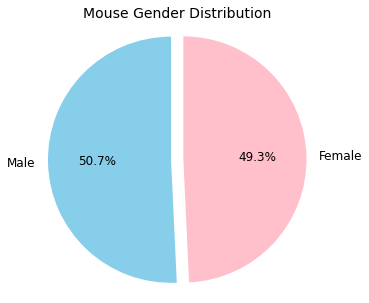

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(5, 5))
plt.pie(gender_data['Mouse Count'],
        autopct="%1.1f%%",
        explode=[0.1,0],
        labels=gender_data.index,
        colors=["skyblue", "pink"],
        startangle=90)

plt.title("Mouse Gender Distribution", fontsize=14)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

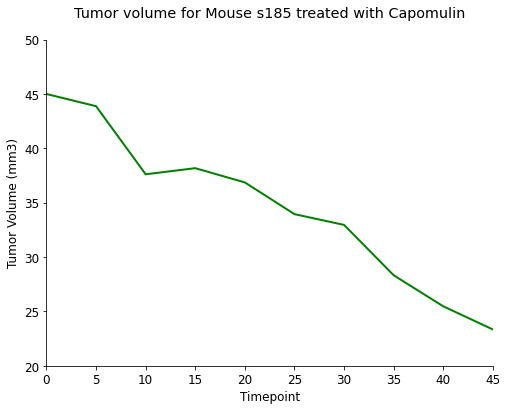

In [63]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Mouse_ID = 's185'

capomulin_time_volume = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == Mouse_ID),
                                          ['Timepoint', 'Tumor Volume (mm3)']
                                      ].reset_index(drop=True).set_index('Timepoint')


ax = capomulin_time_volume.plot(figsize=(8, 6),
                                title="Tumor volume for Mouse " + Mouse_ID + " treated with Capomulin\n",
                                linewidth=2,
                                color='green',
                                legend=False)

ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(0, 45)
ax.set_ylim(20, 50)

# Print our chart to the screen
plt.show()

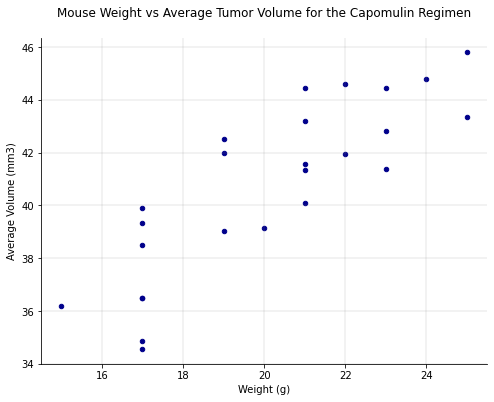

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')]
capomulin_weight_volume = pd.DataFrame(capomulin_data.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
capomulin_weight_volume = capomulin_weight_volume.rename(columns={"Tumor Volume (mm3)": "Average Volume (mm3)"})
capomulin_weight_volume.set_index('Mouse ID')


ax = capomulin_weight_volume.plot(kind="scatter",
                             x="Weight (g)",
                             y="Average Volume (mm3)",
                             title="Mouse Weight vs Average Tumor Volume for the Capomulin Regimen\n",
                             figsize=(8,6),
                             color='darkblue')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

ax.grid(color='grey', linewidth=0.25, alpha=0.8)
plt.show()

## Correlation and Regression


The correlation between both factors is 0.84
The r-squared is: 0.7089



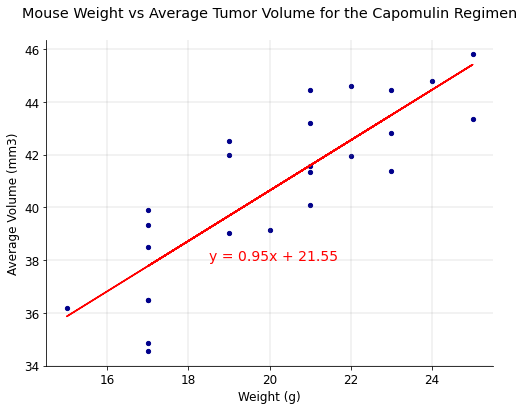

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_weight_volume['Weight (g)']
y_values = capomulin_weight_volume['Average Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between both factors is {round(correlation[0],2)}")


# Print out the r-squared value along with the plot.
plt.figure(figsize=(8,6))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color='darkblue', s=18)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(18.5,38),fontsize=14,color="red")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen\n")
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.grid(alpha=0.8, color='grey', linewidth=0.25)

print(f"The r-squared is: {round(rvalue**2, 4)}\n")
plt.show()
